In [9]:
%%writefile sample.dot
digraph Sausage {
  rankdir=LR;
  splines=spline;
  fontsize=12;
  labelloc="t";
  label="Word sausage (confusion network) for: Exempelvis är 21 och 10 relativt prima";

  node [shape=box, style="rounded,filled", fillcolor=white, fontname="Helvetica"];

  // Connector nodes (not displayed)
  edge [color=gray50, arrowsize=0.7];
  node [shape=point, width=0.02, label="", style=solid];
  c0; c1; c2; c3; c4; c5; c6; c7;

  // Style for alternatives
  node [shape=box, style="rounded,filled", fillcolor="#F7F7F7", margin="0.06,0.04"];

  // Bin 1: Exempelvis
  subgraph cluster1 {
    label="1";
    color="#E0E0E0"; style=dashed; penwidth=1;
    b1a [label="Exempelvis"];
  }

  // Bin 2: är
  subgraph cluster2 {
    label="2";
    color="#E0E0E0"; style=dashed;
    b2a [label="är"];
  }

  // Bin 3: 21 → (tjugo|tju|tjugi)(en|ett)
  subgraph cluster3 {
    label="3";
    color="#E0E0E0"; style=dashed;
    b3a [label="tjugoen"];
    b3b [label="tjugoett"];
    b3c [label="tjuen"];
    b3d [label="tjuett"];
    b3e [label="tjugien"];
    b3f [label="tjugiett"];
  }

  // Bin 4: och
  subgraph cluster4 {
    label="4";
    color="#E0E0E0"; style=dashed;
    b4a [label="och"];
  }

  // Bin 5: 10 → (tio|tie)
  subgraph cluster5 {
    label="5";
    color="#E0E0E0"; style=dashed;
    b5a [label="tio"];
    b5b [label="tie"];
  }

  // Bin 6: relativt
  subgraph cluster6 {
    label="6";
    color="#E0E0E0"; style=dashed;
    b6a [label="relativt"];
  }

  // Bin 7: prima
  subgraph cluster7 {
    label="7";
    color="#E0E0E0"; style=dashed;
    b7a [label="prima"];
  }

  // Connections: each bin chooses exactly one alternative (no epsilons)
  // Start → Bin1
  c0 -> b1a;
  // Bin1 → Bin2
  b1a -> c1; c1 -> b2a;
  // Bin2 → Bin3 (all options)
  b2a -> c2;
  c2 -> b3a; c2 -> b3b; c2 -> b3c; c2 -> b3d; c2 -> b3e; c2 -> b3f;
  // Bin3 → Bin4
  b3a -> c3; b3b -> c3; b3c -> c3; b3d -> c3; b3e -> c3; b3f -> c3;
  c3 -> b4a;
  // Bin4 → Bin5
  b4a -> c4;
  c4 -> b5a; c4 -> b5b;
  // Bin5 → Bin6
  b5a -> c5; b5b -> c5;
  c5 -> b6a;
  // Bin6 → Bin7 → End
  b6a -> c6; c6 -> b7a; b7a -> c7;

  // Optional: thicker edges for a "canonical" path (uncomment to emphasize)
  // edge [penwidth=2.2, color="#4A90E2"];
  // b1a -> c1; c1 -> b2a; b2a -> c2; c2 -> b3b; b3b -> c3; c3 -> b4a;
  // b4a -> c4; c4 -> b5a; b5a -> c5; c5 -> b6a; b6a -> c6; c6 -> b7a; b7a -> c7;
}


Overwriting sample.dot


In [7]:
!dot -Tpng sample.dot -o sample.png

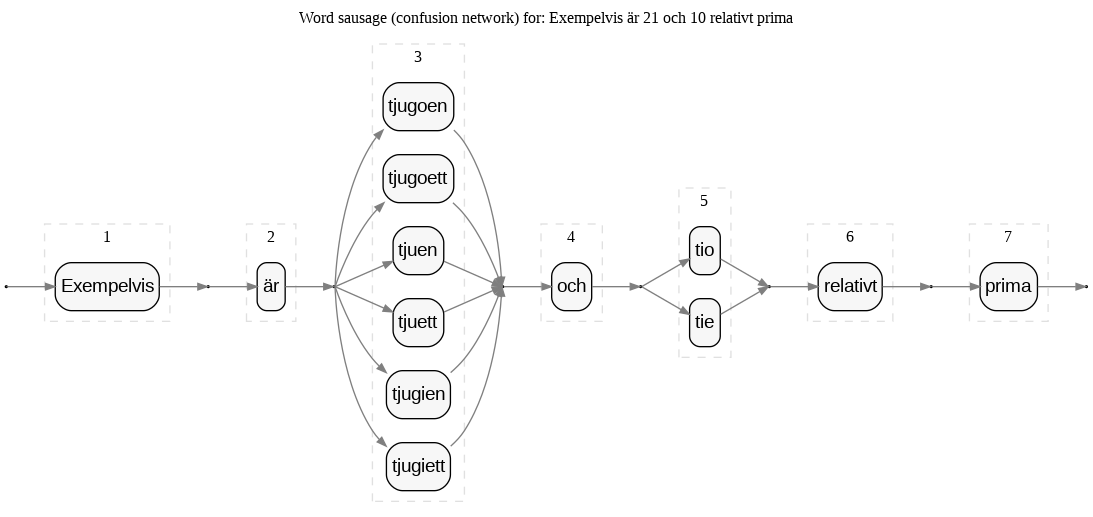

In [8]:
from IPython.display import Image
Image(filename='sample.png')